In [105]:
import os

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd
import seaborn as sns

In [141]:
src = "output/20240618_13-26-23"

In [142]:
df_list = []
for entry in os.scandir(src):
    if entry.is_dir():
        for f in os.scandir(entry.path):
            df = pd.read_csv(f.path)
            df = df.assign(experiment=entry.name)
            df_list.append(df)
data = pd.concat(df_list)
data["latency_ms"] = data["nanoseconds"] / 1e6

In [143]:
data

endpoint  nanoseconds              experiment  latency_ms
0     listbuckets      1122138  parasilo-memory-memory    1.122138
1     listbuckets      1008731  parasilo-memory-memory    1.008731
2     listbuckets       634281  parasilo-memory-memory    0.634281
3     listbuckets       759153  parasilo-memory-memory    0.759153
4     listbuckets       731025  parasilo-memory-memory    0.731025
..            ...          ...                     ...         ...
495  removeobject      1175171        parasilo-ssd-ssd    1.175171
496  removeobject      1047685        parasilo-ssd-ssd    1.047685
497  removeobject      1352073        parasilo-ssd-ssd    1.352073
498  removeobject     41815416        parasilo-ssd-ssd   41.815416
499  removeobject     45197130        parasilo-ssd-ssd   45.197130

[1500 rows x 4 columns]

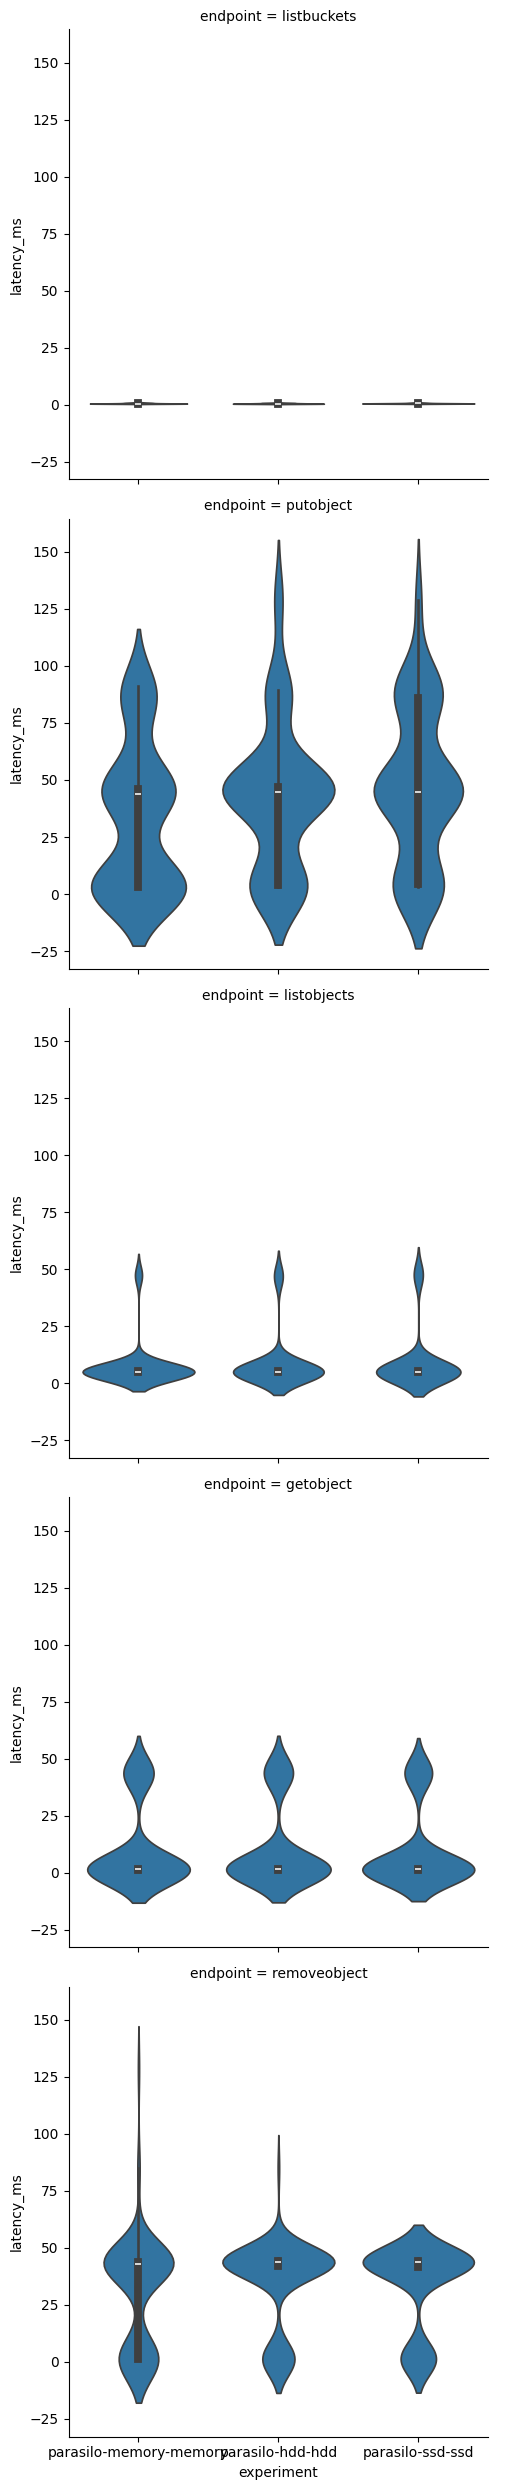

In [144]:
sns.catplot(data=data, x="experiment", y="latency_ms", kind="violin", row="endpoint")

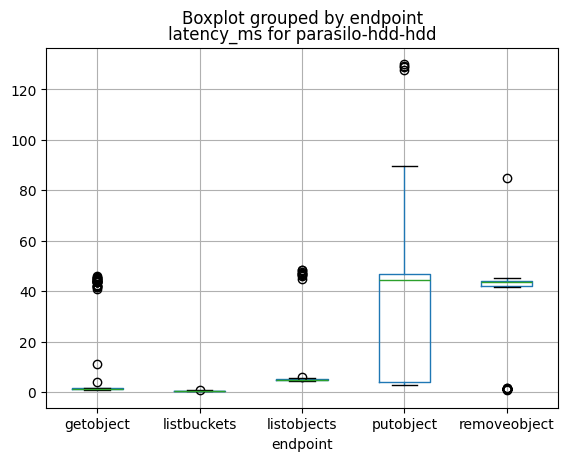

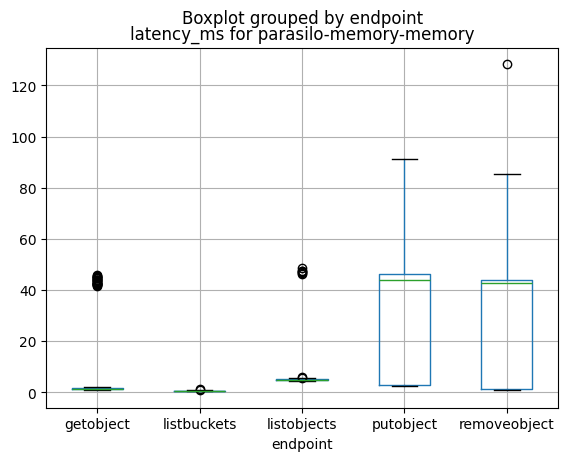

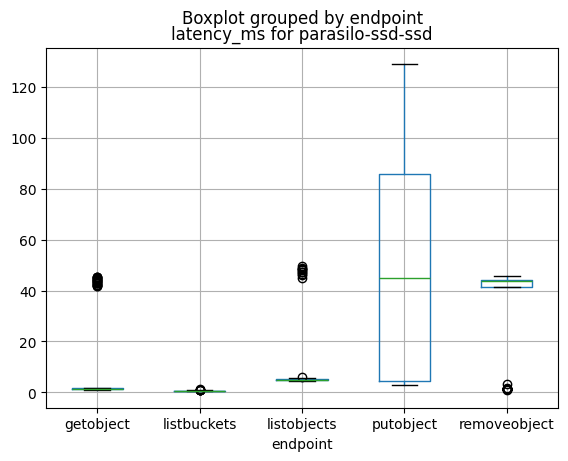

In [145]:
for experiment, subdata in data.groupby("experiment"):
    # Pandas boxplot are not very readable...
    res = subdata.boxplot(column="latency_ms", by="endpoint")
    #res = subdata.plot(kind="scatter", y="latency_ms", x="endpoint", s=100, alpha=0.05)
    #res = sns.violinplot(data=subdata, x="endpoint", y="latency_ms", hue="experiment", inner="point")
    #res = sns.stripplot(data=subdata, x="endpoint", y="latency_ms")
    res.set_title(f"latency_ms for {experiment}")

In [7]:
data.plot?

Signature:      data.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x7fe28e1f6110>
File:           ~/code/garage-g5k-enoslib/venv/lib/python3.11/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'are

In [28]:
data.boxplot?

Signature:
data.boxplot(
    column=None,
    by=None,
    ax=None,
    fontsize: 'int | None' = None,
    rot: 'int' = 0,
    grid: 'bool' = True,
    figsize: 'tuple[float, float] | None' = None,
    layout=None,
    return_type=None,
    backend=None,
    **kwargs,
)
Docstring:
Make a box plot from DataFrame columns.

Make a box-and-whisker plot from DataFrame columns, optionally grouped
by some other columns. A box plot is a method for graphically depicting
groups of numerical data through their quartiles.
The box extends from the Q1 to Q3 quartile values of the data,
with a line at the median (Q2). The whiskers extend from the edges
of box to show the range of the data. By default, they extend no more than
`1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box, ending at the farthest
data point within that interval. Outliers are plotted as separate dots.

For further details see
Wikipedia's entry for `boxplot <https://en.wikipedia.org/wiki/Box_plot>`_.

Parameters
----------
column

In [8]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [50]:
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
) -> 'None'
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index. This alignment also
    occurs if data is a Series or a DataFrame itself. Alignment is done on
    Series/DataFrame inputs.

    If data is a list of dicts, column order follows 

In [88]:
plt.boxplot?

Signature:
plt.boxplot(
    x: 'ArrayLike | Sequence[ArrayLike]',
    notch: 'bool | None' = None,
    sym: 'str | None' = None,
    vert: 'bool | None' = None,
    whis: 'float | tuple[float, float] | None' = None,
    positions: 'ArrayLike | None' = None,
    widths: 'float | ArrayLike | None' = None,
    patch_artist: 'bool | None' = None,
    bootstrap: 'int | None' = None,
    usermedians: 'ArrayLike | None' = None,
    conf_intervals: 'ArrayLike | None' = None,
    meanline: 'bool | None' = None,
    showmeans: 'bool | None' = None,
    showcaps: 'bool | None' = None,
    showbox: 'bool | None' = None,
    showfliers: 'bool | None' = None,
    boxprops: 'dict[str, Any] | None' = None,
    tick_labels: 'Sequence[str] | None' = None,
    flierprops: 'dict[str, Any] | None' = None,
    medianprops: 'dict[str, Any] | None' = None,
    meanprops: 'dict[str, Any] | None' = None,
    capprops: 'dict[str, Any] | None' = None,
    whiskerprops: 'dict[str, Any] | None' = None,
    manage_t

In [94]:
plt.violinplot?

Signature:
plt.violinplot(
    dataset: 'ArrayLike | Sequence[ArrayLike]',
    positions: 'ArrayLike | None' = None,
    vert: 'bool' = True,
    widths: 'float | ArrayLike' = 0.5,
    showmeans: 'bool' = False,
    showextrema: 'bool' = True,
    showmedians: 'bool' = False,
    quantiles: 'Sequence[float | Sequence[float]] | None' = None,
    points: 'int' = 100,
    bw_method: "Literal['scott', 'silverman'] | float | Callable[[GaussianKDE], float] | None" = None,
    side: "Literal['both', 'low', 'high']" = 'both',
    *,
    data=None,
) -> 'dict[str, Collection]'
Docstring:
Make a violin plot.

Make a violin plot for each column of *dataset* or each vector in
sequence *dataset*.  Each filled area extends to represent the
entire data range, with optional lines at the mean, the median,
the minimum, the maximum, and user-specified quantiles.

Parameters
----------
dataset : Array or a sequence of vectors.
  The input data.

positions : array-like, default: [1, 2, ..., n]
  The positi